<a href="https://colab.research.google.com/github/FlossyMaze/forage-british-airlines/blob/main/Task2/Forage_British_Airways_%7C_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
df = pd.read_csv('/content/customer_booking.csv', encoding='latin1')

In [108]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [109]:
df['booking_complete'].value_counts()



0    42522
1     7478
Name: booking_complete, dtype: int64

In [110]:
df.columns


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [111]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extracting features (X) and target variable (y)
X = df.iloc[:, 0:-1]  # Exclude the last column 'booking_complete'
y = df['booking_complete']

# # Handle categorical variables using one-hot encoding
# X = pd.get_dummies(X, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# # Assuming 'X' contains features and 'y' contains the target variable ('booking_complete')
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Instantiate the Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = rf_model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# # Display additional metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [112]:
from imblearn.over_sampling import RandomOverSampler

# Resample the data to address class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Handle categorical variables using one-hot encoding
X_resampled = pd.get_dummies(X_resampled, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9580222235287201

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      8444
           1       0.93      0.99      0.96      8565

    accuracy                           0.96     17009
   macro avg       0.96      0.96      0.96     17009
weighted avg       0.96      0.96      0.96     17009


Confusion Matrix:
[[7781  663]
 [  51 8514]]


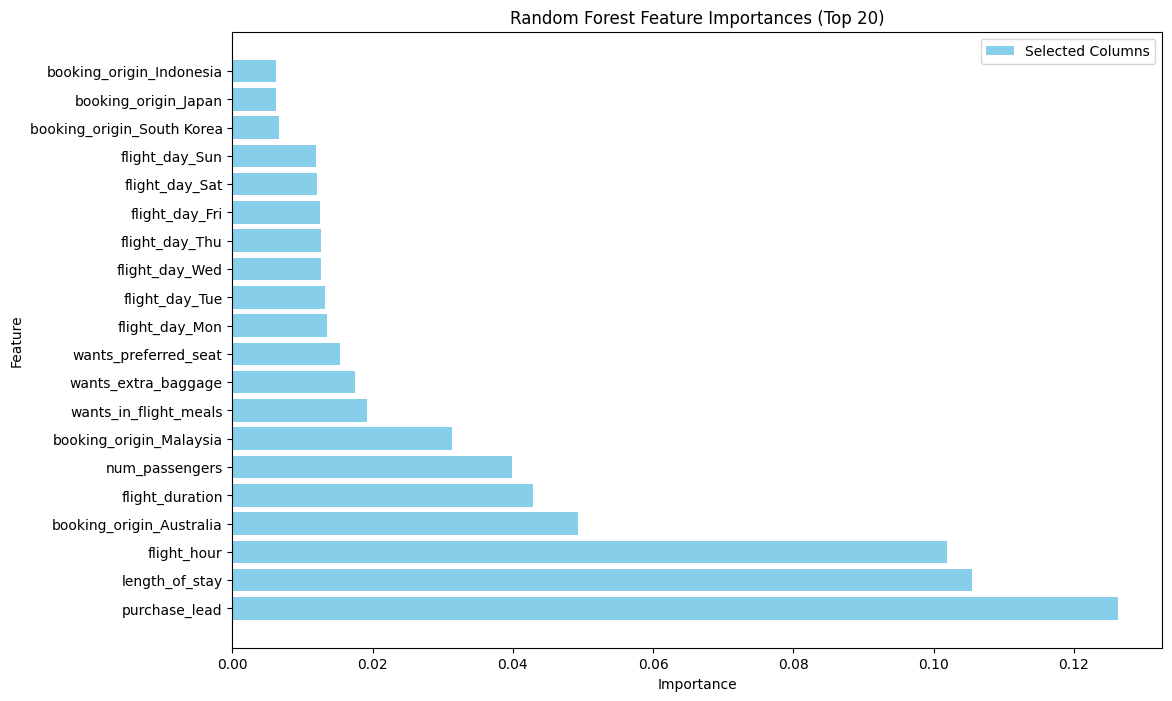

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate each feature with its importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define the 14 specified columns
selected_columns = ['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
                    'length_of_stay', 'flight_hour', 'flight_day', 'route',
                    'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
                    'wants_in_flight_meals', 'flight_duration']

# Get the grouped columns
grouped_columns = list(set(feature_importance_df['Feature']) - set(selected_columns))

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate each feature with its importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features
top_n = 20
plt.figure(figsize=(12, 8))
plt.barh(np.arange(top_n), feature_importance_df.head(top_n)['Importance'], color='skyblue', label='Selected Columns')

plt.yticks(np.arange(top_n), feature_importance_df.head(top_n)['Feature'])
plt.title('Random Forest Feature Importances (Top 20)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend()

plt.show()

In [117]:
feature_importance_df.shape


(923, 2)